In [64]:
from k_means_constrained import KMeansConstrained
import matplotlib.pyplot as plt
import numpy as np
import random
from Geometric_Median import geometric_median

def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [65]:
def create_dp(points):
    x = [i for i,j in points]
    y = [j for i,j in points]

    dp = [np.mean(x), np.mean(y)]

    return dp

In [66]:
def create_delivery(x,y,n, seed_value = None):
    if seed_value != None:
        random.seed(seed_value)

    x_range = [x[0], y[0]]
    y_range = [x[1], y[1]]
    loc = []

    for _ in range(n):
        x_loc = random.uniform(x_range[0], x_range[1])
        y_loc = random.uniform(y_range[0], y_range[1])
        loc.append(tuple([x_loc, y_loc]))

    return loc

In [67]:
def clusters_plot(clusters, centroids, dp=False):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.title("Delivery Points")
    plt.show()

In [68]:
def dp_plot(clusters, centroids, dp, title=False):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        for i in range(len(points)-1):
            plt.plot([points[i][0],points[i+1][0]],[points[i][1], points[i+1][1]], c='gray')
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    if dp:
        plt.scatter(dp[0], dp[1], marker='X', c='red', s=200)
    
    if title:
        plt.title(title)
    else:
        plt.title("Multi Capacity Geometric Median")
    # plt.show()

In [69]:
def calculate_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2)**2))

In [70]:
def total_dist(pts):
    sum = 0
    for i in range(len(pts)-1):
        sum += calculate_distance(pts[i], pts[i+1])

    return sum

In [71]:
from itertools import permutations

def tsp(cluster):
    paths = list(permutations(cluster))
    distance = []
    for path in paths:
        path = list(path)
        dist = 0
        for i in range(len(path)-1):
            dist += calculate_distance(path[i], path[i+1])
        distance.append(dist)
    
    ans_route = paths[np.argmin(distance)]
    ans_distance = distance[np.argmin(distance)]

    return [ans_route[0], ans_route[-1]],ans_route

In [72]:
def tsp_brut(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].append(dp)
        path[i].insert(0, dp)

        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(path[i])-1):
            sum += calculate_distance(path[i][j], path[i][j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

In [73]:
def get_entry_exit_points(clusters):
    entry_exit_list = []

    for cls_id, cluster in clusters.items():
        entry_exit_list.append(cluster[1])
        entry_exit_list.append(cluster[-2])

    return entry_exit_list

In [74]:
def replace_dp(clusters, enh_dp):
    temp_cluster = clusters.copy()
    for cls_id, cluster in temp_cluster.items():
        cluster[0] = enh_dp
        cluster[-1] = enh_dp

    return clusters

## Main

In [75]:
n = 20
k = 4

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
delivery_loc = create_delivery(x, y, n, seed_value = 3)

centroids, clusters = KMeans(delivery_loc, n, k)

clusters

{0: [(22.587953139411745, 88.4398924504856),
  (22.57314647164953, 88.45493300888701),
  (22.59431202023091, 88.44873661953937),
  (22.588990981266033, 88.45257852485145)],
 1: [(22.598567392620485, 88.40522005853504),
  (22.599121327832584, 88.41069969770712),
  (22.60046357622784, 88.40512362462181),
  (22.609072966404028, 88.40727605754667)],
 2: [(22.613919260673686, 88.43128496988444),
  (22.60731315022789, 88.43167714664024),
  (22.604066555220903, 88.43906681314078),
  (22.608519380334627, 88.43144504131006)],
 3: [(22.582475532024315, 88.43604836210906),
  (22.583363191594614, 88.41609091389141),
  (22.585102607869903, 88.40299715679465),
  (22.57824270769833, 88.41497395901541)],
 4: [(22.598946717318835, 88.45690211778003),
  (22.60243119284873, 88.45759554433646),
  (22.602236373569866, 88.4603187541924),
  (22.59105177382611, 88.46125178487777)]}

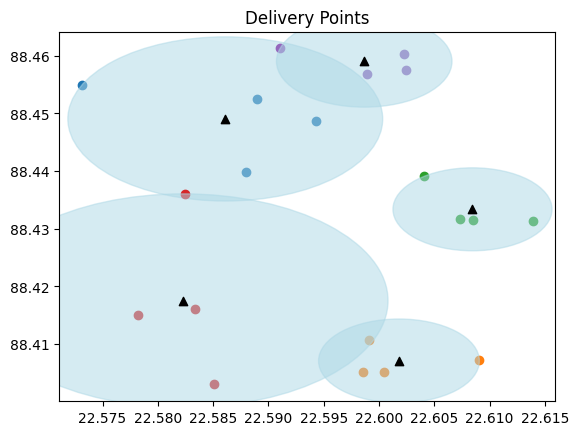

In [76]:
clusters_plot(clusters, centroids)

In [77]:
dp = create_dp(centroids)

print(dp)

[22.59546481594255, 88.43320563030736]


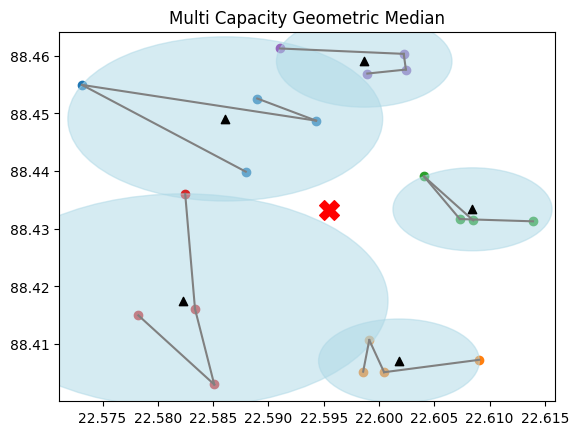

In [78]:
dp_plot(clusters.copy(), centroids.copy(), dp)

In [79]:
for i in clusters:
    clusters[i] = tsp_brut(clusters[i].copy(), dp)

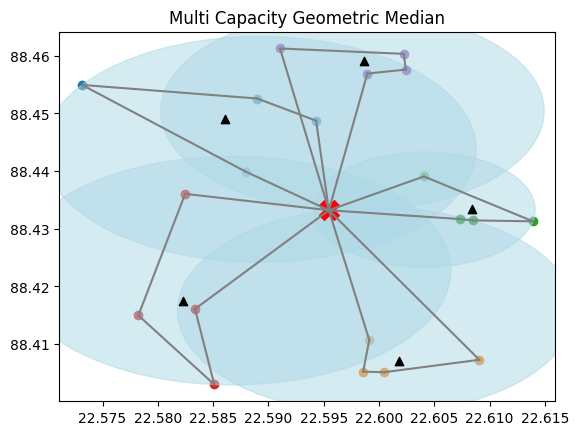

In [80]:
dp_plot(clusters, centroids, dp)

In [81]:
entry_exit_list = get_entry_exit_points(clusters.copy())

enh_dp = geometric_median(entry_exit_list)

cluster_2 = replace_dp(clusters.copy(), enh_dp)

In [82]:
total_distance = 0

for cls_id, cluster_path in cluster_2.items():
    distance = total_dist(cluster_path)
    total_distance += distance

print("Total distance :", total_distance)

Total distance : 0.3279698053125607


In [83]:
import pandas as pd

df = pd.read_csv('./Multi_Capacity_performance.csv')

new_row = {
    'total_delivery':n,
    'drone_capacity':k,
    'euclidean_points':n,
    'manhattan_points':0,
    'distance':total_distance,
}

df.loc[len(df)] = new_row

df.tail()

,total_delivery,drone_capacity,euclidean_points,manhattan_points,distance
62,50,1,28,22,2.163731
63,50,8,50,0,0.490729
64,20,4,20,0,0.327970
65,25,4,25,0,0.395916
66,20,4,20,0,0.327970


In [84]:
try:
    df.to_csv('./Multi_Capacity_performance.csv', index=False)
except:
    print("Unknown error occurs")